In [10]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from xgboost import XGBClassifier

In [11]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option("display.max_columns",None)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
df=df.drop(columns=['customerID'])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
  if col not in numerical_cols:
    print(col,df[col].unique())
    print('-'*70)

gender ['Female' 'Male']
----------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
----------------------------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
------

In [18]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
len(df[df['TotalCharges']==' '])

11

In [21]:
len(df[df['tenure']==0])

11

In [22]:
df['TotalCharges']=df['TotalCharges'].replace(' ',0.0)

In [23]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [25]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(4,4))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  col_mean=df[column_name].mean()
  col_median=df[column_name].median()

  plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
  plt.axvline(col_median,color='blue',linestyle='-',label='Median')

  plt.legend()
  plt.show()

In [28]:
def plot_box(df,column_name):
  plt.figure(figsize=(4,4))
  sns.boxplot(df[column_name])
  plt.title(f'Boxplot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

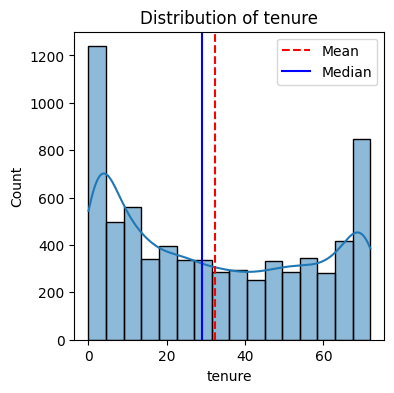

In [29]:
plot_histogram(df,'tenure')

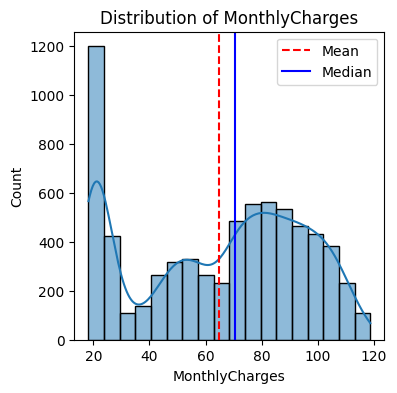

In [30]:
plot_histogram(df,'MonthlyCharges')

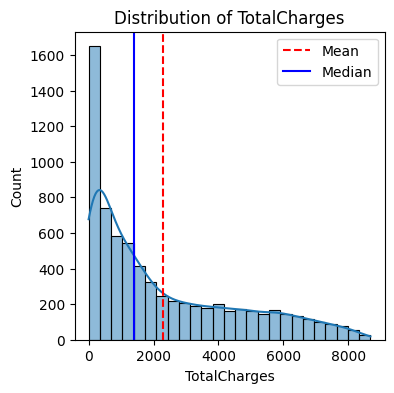

In [31]:
plot_histogram(df,'TotalCharges')

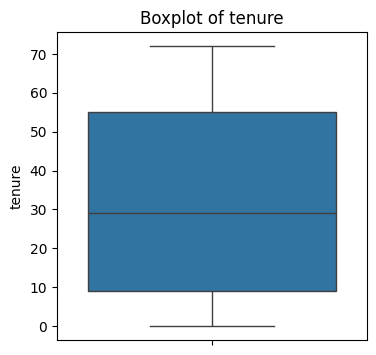

In [32]:
plot_box(df,'tenure')

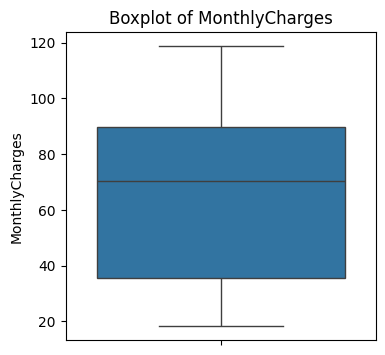

In [33]:
plot_box(df,'MonthlyCharges')

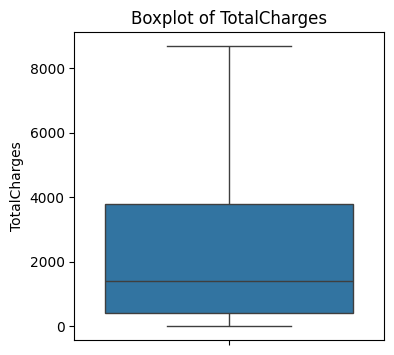

In [34]:
plot_box(df,'TotalCharges')

Text(0.5, 1.0, 'Correlation Heatmap')

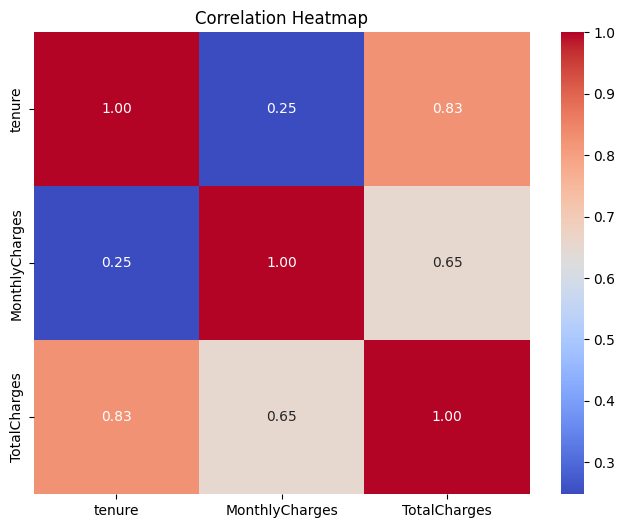

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [37]:
object_cols=df.select_dtypes(include='object').columns.to_list()
object_cols=['SeniorCitizen']+object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

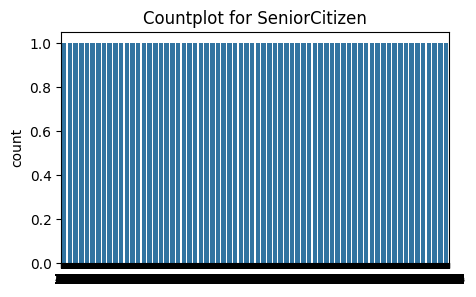

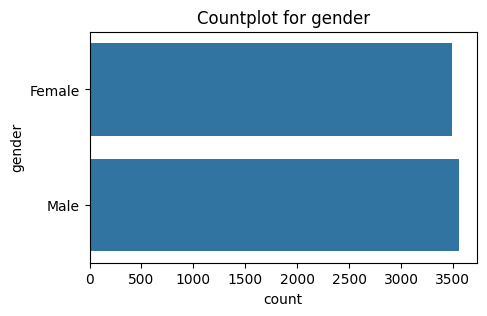

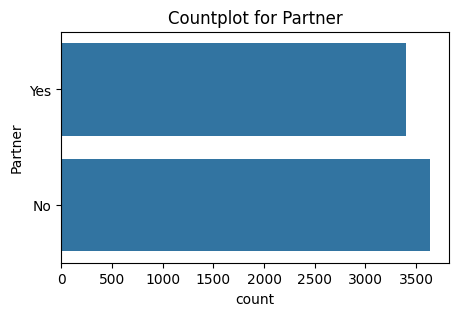

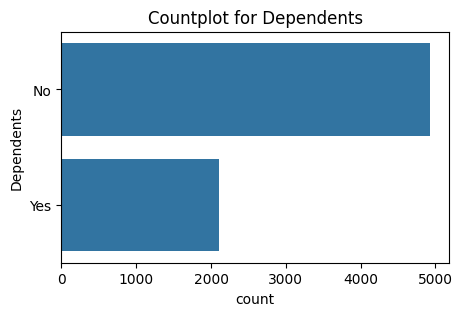

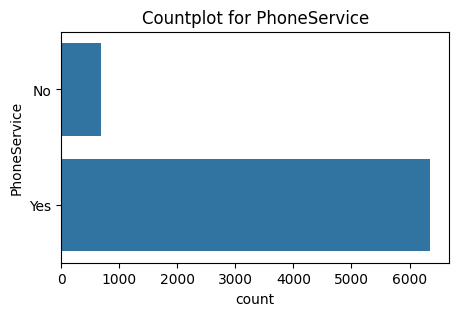

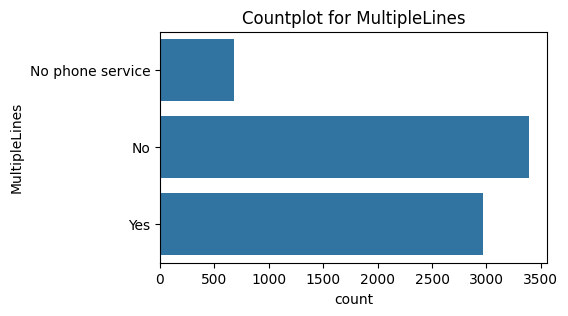

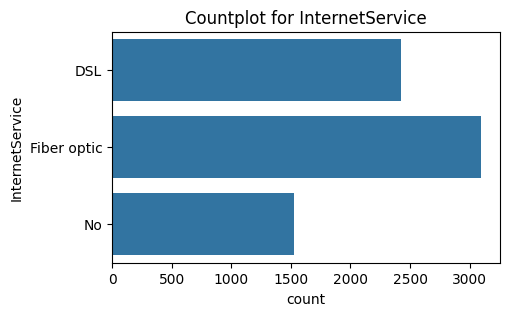

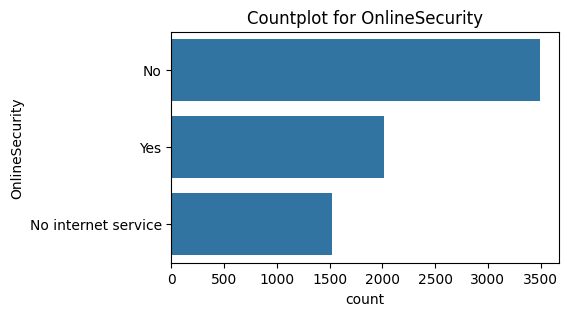

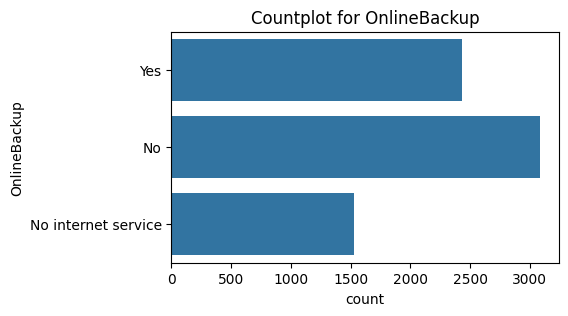

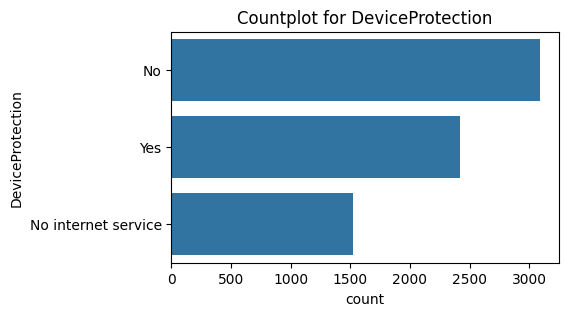

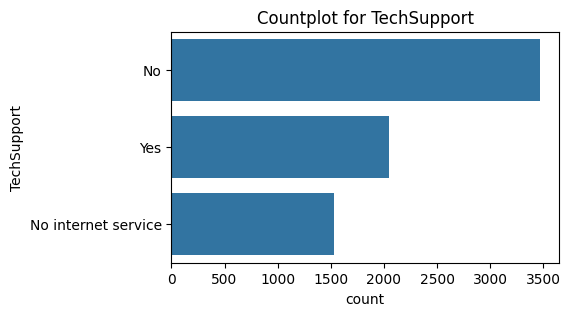

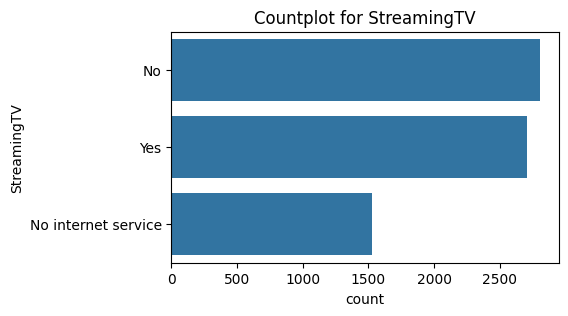

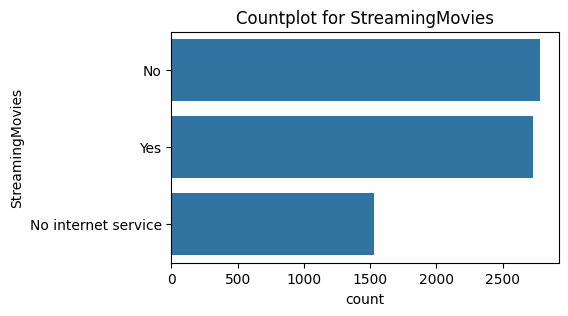

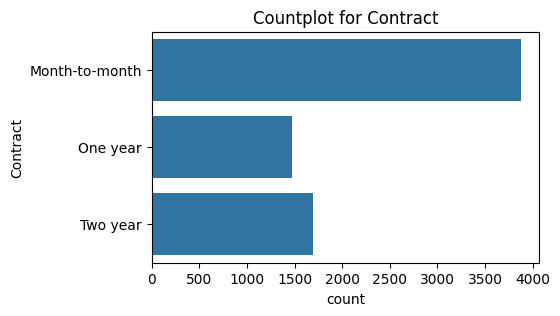

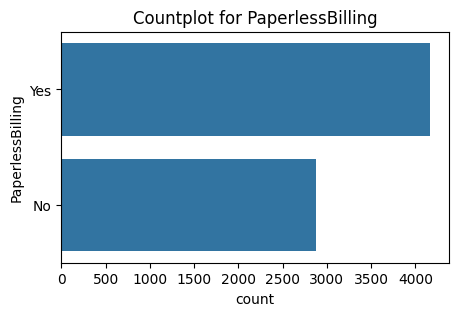

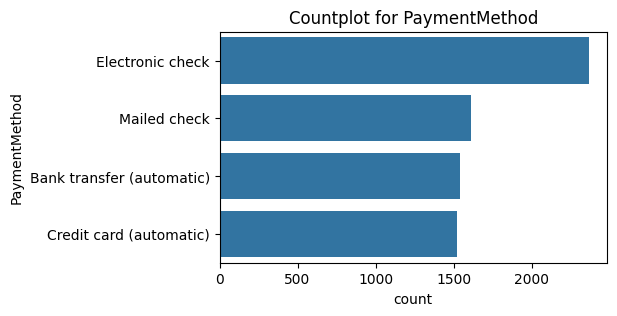

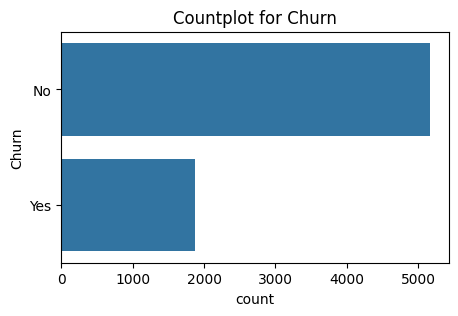

In [38]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(df[col])
  plt.title(f"Countplot for {col}")
  plt.show()

In [39]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [40]:
object_cols=df.select_dtypes(include='object').columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [41]:
encoders={}

for col in object_cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  encoders[col]=le

with open('encoders.pkl','wb')as f:
  pickle.dump(encoders,f)

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
X=df.drop(columns=['Churn'])
Y=df['Churn']

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [45]:
Y_train.value_counts()

Churn
0    4128
1    1506
Name: count, dtype: int64

In [46]:
smote=SMOTE(random_state=3)

In [47]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [48]:
Y_train_smote.value_counts()

Churn
1    4128
0    4128
Name: count, dtype: int64

In [49]:
models={
    'dtc':DecisionTreeClassifier(random_state=3),
    'rfc':RandomForestClassifier(random_state=3),
    'xgb':XGBClassifier(random_state=3),
    'abc':AdaBoostClassifier(random_state=3)
}

In [50]:
cv_scores={}

for model_name,model in models.items():
  print(f"Training {model_name} with default params.")
  scores=cross_val_score(model,X_train_smote,Y_train_smote,cv=5,scoring='accuracy')
  cv_scores[model_name]=scores
  print(f"{model_name} cross validation accuracy: {np.mean(scores):.2f}")

Training dtc with default params.
dtc cross validation accuracy: 0.78
Training rfc with default params.
rfc cross validation accuracy: 0.84
Training xgb with default params.
xgb cross validation accuracy: 0.83
Training abc with default params.
abc cross validation accuracy: 0.80


In [51]:
cv_scores

{'dtc': array([0.71246973, 0.7104785 , 0.83403998, 0.82434888, 0.83827983]),
 'rfc': array([0.7657385 , 0.75893398, 0.89460933, 0.89097517, 0.8970321 ]),
 'xgb': array([0.72760291, 0.74318595, 0.90127196, 0.88976378, 0.89036947]),
 'abc': array([0.75605327, 0.75529982, 0.83343428, 0.82980012, 0.82858873])}

In [52]:
rfc=RandomForestClassifier(random_state=3)

In [53]:
rfc.fit(X_train_smote,Y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
predictions=rfc.predict(X_test)

In [55]:
print(f"Accuracy Score:\n{accuracy_score(Y_test,predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test,predictions)}")
print(f"Classification Report:\n{classification_report(Y_test,predictions)}")

Accuracy Score:
0.7906316536550745
Confusion Matrix:
[[908 138]
 [157 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1046
           1       0.60      0.57      0.58       363

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [56]:
model_data={'model':rfc,'feature_names':X.columns.tolist()}
with open('customer_churn_model.pkl','wb')as f:
  pickle.dump(rfc,f)

In [57]:
X_test.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')